## Data Preprocessing

In [ ]:
pip install boto3 pandas scikit-learn matplotlib seaborn tqdm

In [2]:
import boto3
import pandas as pd
import json
from decimal import Decimal
from io import StringIO
from time import sleep
from tqdm import tqdm

In [4]:
session = boto3.Session()
credentials = session.get_credentials() 
access_key = credentials.access_key
secret_key = credentials.secret_key
token = credentials.token

In [ ]:
dynamodb = boto3.resource('dynamodb', aws_access_key_id=access_key, aws_secret_access_key=secret_key, aws_session_token=token, region_name = 'us-east-1')
dynamodbTable = dynamodb.Table('HotelReservations')

lastEvaluatedKey = None
items = []

while True:
    if lastEvaluatedKey == None:
        response = dynamodbTable.scan()
    else:
        response = dynamodbTable.scan(
        ExclusiveStartKey=lastEvaluatedKey
    )

    items.extend(response['Items'])
    sleep(5)
    
    if 'LastEvaluatedKey' in response:
        lastEvaluatedKey = response['LastEvaluatedKey']
        print(len(items))
    else:
        break

dataset = json.dumps(items, default = float)
dataset = pd.read_json(StringIO(dataset))
dataset

In [5]:
dataset = pd.read_csv('../Hotel Reservations.csv')
dataset

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled


In [6]:
dataset_encoded = pd.get_dummies(dataset, prefix = ['type_of_meal_plan', 'room_type_reserved', 'market_segment_type', 'booking_status'], columns = ['type_of_meal_plan', 'room_type_reserved', 'market_segment_type', 'booking_status'])
dataset_encoded

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,...,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Aviation,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online,booking_status_Canceled,booking_status_Not_Canceled
0,INN00001,2,0,1,2,0,224,2017,10,2,...,False,False,False,False,False,False,True,False,False,True
1,INN00002,2,0,2,3,0,5,2018,11,6,...,False,False,False,False,False,False,False,True,False,True
2,INN00003,1,0,2,1,0,1,2018,2,28,...,False,False,False,False,False,False,False,True,True,False
3,INN00004,2,0,0,2,0,211,2018,5,20,...,False,False,False,False,False,False,False,True,True,False
4,INN00005,2,0,1,1,0,48,2018,4,11,...,False,False,False,False,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3,0,2,6,0,85,2018,8,3,...,False,False,False,False,False,False,False,True,False,True
36271,INN36272,2,0,1,3,0,228,2018,10,17,...,False,False,False,False,False,False,False,True,True,False
36272,INN36273,2,0,2,6,0,148,2018,7,1,...,False,False,False,False,False,False,False,True,False,True
36273,INN36274,2,0,0,3,0,63,2018,4,21,...,False,False,False,False,False,False,False,True,True,False


In [10]:
dataset_labeled = dataset_encoded
dataset_labeled['label_avg_price_per_room'] = [1 if dataset_encoded['avg_price_per_room'][i] <= 85 else 2 if dataset_encoded['avg_price_per_room'][i] > 85 and dataset_encoded['avg_price_per_room'][i] < 115 else 3 for i in range(len(dataset_encoded))]
dataset_labeled_with_ids = dataset_labeled.drop(['avg_price_per_room'], axis = 1)
dataset_labeled = dataset_labeled.drop(['Booking_ID', 'avg_price_per_room'], axis = 1)
dataset_labeled

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,...,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Aviation,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online,booking_status_Canceled,booking_status_Not_Canceled,label_avg_price_per_room
0,2,0,1,2,0,224,2017,10,2,0,...,False,False,False,False,False,True,False,False,True,1
1,2,0,2,3,0,5,2018,11,6,0,...,False,False,False,False,False,False,True,False,True,2
2,1,0,2,1,0,1,2018,2,28,0,...,False,False,False,False,False,False,True,True,False,1
3,2,0,0,2,0,211,2018,5,20,0,...,False,False,False,False,False,False,True,True,False,2
4,2,0,1,1,0,48,2018,4,11,0,...,False,False,False,False,False,False,True,True,False,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,3,0,2,6,0,85,2018,8,3,0,...,False,False,False,False,False,False,True,False,True,3
36271,2,0,1,3,0,228,2018,10,17,0,...,False,False,False,False,False,False,True,True,False,2
36272,2,0,2,6,0,148,2018,7,1,0,...,False,False,False,False,False,False,True,False,True,2
36273,2,0,0,3,0,63,2018,4,21,0,...,False,False,False,False,False,False,True,True,False,2


## Atributes selection

In [7]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [8]:
X = dataset_labeled.iloc[:, :-1].values
X = np.array(X).astype('float32')
X

array([[2., 0., 1., ..., 0., 0., 1.],
       [2., 0., 2., ..., 1., 0., 1.],
       [1., 0., 2., ..., 1., 1., 0.],
       ...,
       [2., 0., 2., ..., 1., 0., 1.],
       [2., 0., 0., ..., 1., 1., 0.],
       [2., 0., 1., ..., 0., 0., 1.]], dtype=float32)

In [9]:
Y = dataset_labeled.iloc[:, -1].values
Y = np.array(Y).astype('float32')
Y

array([1., 2., 1., ..., 2., 2., 3.], dtype=float32)

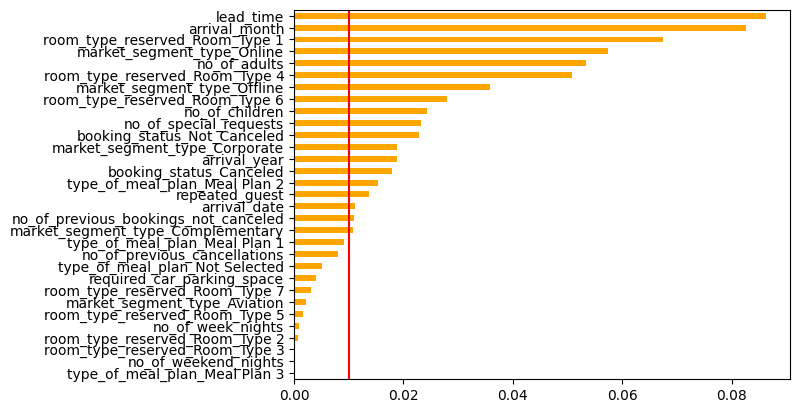

In [10]:
# Info Gain

importances = mutual_info_classif(X, Y)
feature_importances = pd.Series(importances, dataset_labeled.columns[0:len(dataset_labeled.columns)-1]).sort_values(ascending = True)
feature_importances.plot(kind = 'barh', color = 'orange').axvline(x=0.01, color='r', linestyle='-')
plt.show()

Random Forest

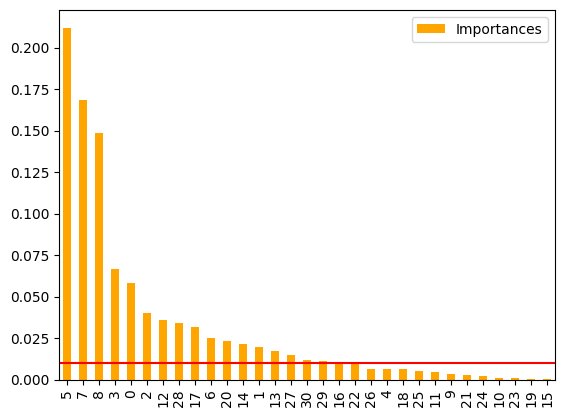

In [11]:
model = RandomForestClassifier(n_estimators=400)
model.fit(X, Y)

rf_importances = model.feature_importances_

result = pd.DataFrame({'Importances': rf_importances})
result.set_index('Importances')
result = result.sort_values("Importances", ascending=False)
result.plot.bar(color='orange').axhline(y=0.01, color='r', linestyle='-')

Pearson Correlation Coefficient

<Axes: >

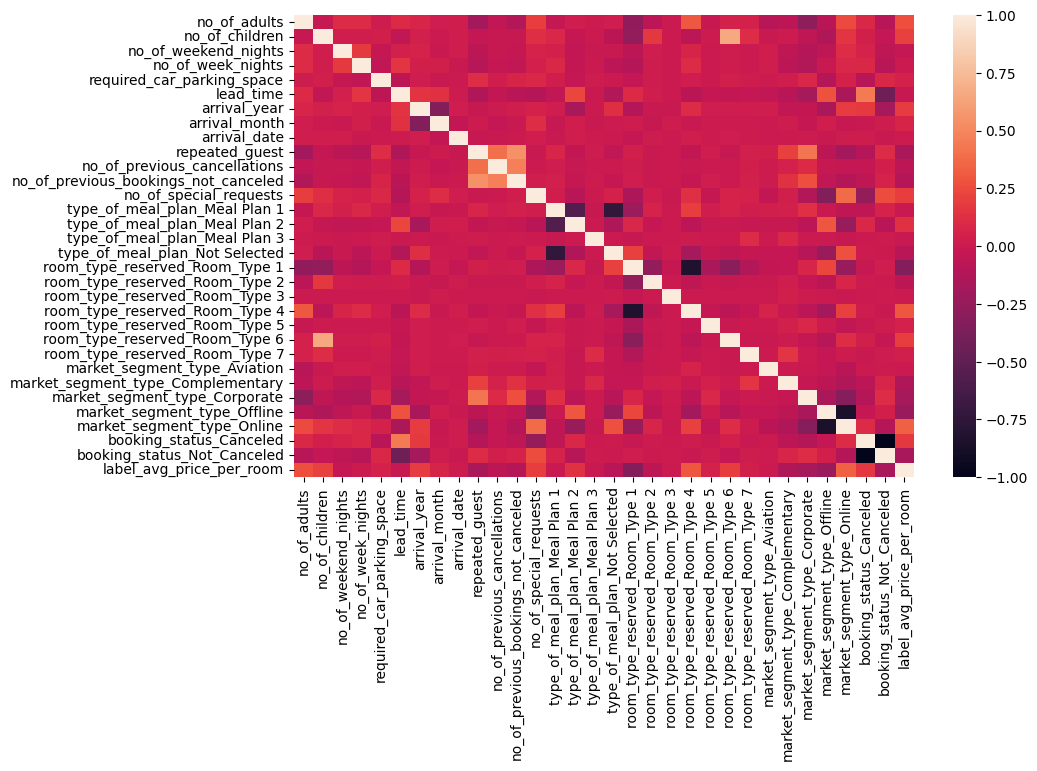

In [12]:
pearson_correlation = dataset_labeled.corr()
plt.figure(figsize=(10,6))
sns.heatmap(pearson_correlation)

In [13]:
pearson_correlation['label_avg_price_per_room'].sort_values(ascending=True)

room_type_reserved_Room_Type 1         -0.331724
market_segment_type_Offline            -0.232348
market_segment_type_Corporate          -0.176413
booking_status_Not_Canceled            -0.166523
repeated_guest                         -0.157091
market_segment_type_Complementary      -0.133540
no_of_previous_bookings_not_canceled   -0.101641
type_of_meal_plan_Not Selected         -0.091924
room_type_reserved_Room_Type 2         -0.069291
no_of_previous_cancellations           -0.065158
no_of_weekend_nights                   -0.032719
lead_time                              -0.020239
type_of_meal_plan_Meal Plan 1          -0.015119
type_of_meal_plan_Meal Plan 3          -0.009230
no_of_week_nights                      -0.005931
room_type_reserved_Room_Type 3         -0.005397
market_segment_type_Aviation           -0.003966
arrival_date                            0.006782
room_type_reserved_Room_Type 7          0.034234
room_type_reserved_Room_Type 5          0.048477
required_car_parking

In [14]:
from collections import Counter

ig = [
    'no_of_week_nights',
    'room_type_reserved_Room_Type 2',
    'required_car_parking_space',
    'type_of_meal_plan_Meal Plan 1',
    'type_of_meal_plan_Meal Plan 3',
    'type_of_meal_plan_Not Selected',
    'room_type_reserved_Room_Type 5',
    'market_segment_type_Aviation',
    'no_of_previous_cancellations',
    'room_type_reserved_Room_Type 7',
    'room_type_reserved_Room_Type 3',
    'no_of_weekend_nights'
]

rf = [
    'required_car_parking_space',
    'market_segment_type_Corporate',
    'room_type_reserved_Room_Type 2',
    'market_segment_type_Complementary',
    'no_of_previous_bookings_not_canceled',
    'repeated_guest',
    'room_type_reserved_Room_Type 5',
    'market_segment_type_Aviation',
    'no_of_previous_cancellations',
    'room_type_reserved_Room_Type 7',
    'room_type_reserved_Room_Type 3',
    'type_of_meal_plan_Meal Plan 3'
]

corr = [
    'room_type_reserved_Room_Type 1',
    'market_segment_type_Offline',
    'market_segment_type_Corporate',
    'booking_status_Not_Canceled',
    'repeated_guest',
    'market_segment_type_Complementary',
    'no_of_previous_bookings_not_canceled',
    'type_of_meal_plan_Not Selected',
    'room_type_reserved_Room_Type 2',
    'no_of_previous_cancellations',
    'no_of_weekend_nights',
    'lead_time',
    'type_of_meal_plan_Meal Plan 1',
    'type_of_meal_plan_Meal Plan 3',
    'no_of_week_nights',
    'room_type_reserved_Room_Type 3',
    'market_segment_type_Aviation'
]

combine = ig + rf + corr

removed_attrs = Counter(combine)
removed_attrs = Counter(attr for attr in removed_attrs.elements() if removed_attrs[attr] >= 2)
removed_attrs

Counter({'room_type_reserved_Room_Type 2': 3,
         'type_of_meal_plan_Meal Plan 3': 3,
         'market_segment_type_Aviation': 3,
         'no_of_previous_cancellations': 3,
         'room_type_reserved_Room_Type 3': 3,
         'no_of_week_nights': 2,
         'required_car_parking_space': 2,
         'type_of_meal_plan_Meal Plan 1': 2,
         'type_of_meal_plan_Not Selected': 2,
         'room_type_reserved_Room_Type 5': 2,
         'room_type_reserved_Room_Type 7': 2,
         'no_of_weekend_nights': 2,
         'market_segment_type_Corporate': 2,
         'market_segment_type_Complementary': 2,
         'no_of_previous_bookings_not_canceled': 2,
         'repeated_guest': 2})

In [ ]:
print(f"Previous original dataset attr: {len(dataset_labeled.columns)}")

atributos = []
for atributo in dataset_labeled.columns:    
    if atributo not in removed_attrs:
        atributos.append(atributo)

print(f"Pos dataset attr: {len(atributos)}")

## Upload modified dataset

In [16]:
dataset_labeled_modified = dataset_labeled_with_ids.drop(removed_attrs, axis = 1)
dataset_labeled_modified_json = json.loads(dataset_labeled_modified.to_json(orient = "records"), parse_float = Decimal)

boto3.setup_default_session()
client = boto3.client('dynamodb')
tables = client.list_tables()

if 'HotelReservationsModified' not in tables['TableNames']:
    print('Creating DynamoDB table')
    dynamodb = boto3.resource('dynamodb', aws_access_key_id=access_key, aws_secret_access_key=secret_key, aws_session_token=token, region_name = 'us-east-1')

    table = dynamodb.create_table(
        TableName ='HotelReservationsModified',
        KeySchema =
        [
            {
                'AttributeName': 'Booking_ID',
                'KeyType': 'HASH'
            }
        ],
        AttributeDefinitions =
        [
            {
                'AttributeName': 'Booking_ID',
                'AttributeType': 'S'
            }
        ],
        ProvisionedThroughput =
        {
            'ReadCapacityUnits': 5,
            'WriteCapacityUnits': 5
        }
    )

    table.meta.client.get_waiter('table_exists').wait(TableName = 'HotelReservationsModified')

    print('Success')

    dynamodbTable = dynamodb.Table('HotelReservationsModified')

    for record in tqdm(dataset_labeled_modified_json, desc='Uploading...'):
        dynamodbTable.put_item(Item = record)
    
    print('Success')
else:
    print('Table already exists')

## Modified dataset statistics

In [17]:
dataset_labeled_modified.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Booking_ID                      36275 non-null  object
 1   no_of_adults                    36275 non-null  int64 
 2   no_of_children                  36275 non-null  int64 
 3   lead_time                       36275 non-null  int64 
 4   arrival_year                    36275 non-null  int64 
 5   arrival_month                   36275 non-null  int64 
 6   arrival_date                    36275 non-null  int64 
 7   no_of_special_requests          36275 non-null  int64 
 8   type_of_meal_plan_Meal Plan 2   36275 non-null  bool  
 9   room_type_reserved_Room_Type 1  36275 non-null  bool  
 10  room_type_reserved_Room_Type 4  36275 non-null  bool  
 11  room_type_reserved_Room_Type 6  36275 non-null  bool  
 12  market_segment_type_Offline     36275 non-null

In [18]:
dataset_labeled_modified.isnull().sum()

Booking_ID                        0
no_of_adults                      0
no_of_children                    0
lead_time                         0
arrival_year                      0
arrival_month                     0
arrival_date                      0
no_of_special_requests            0
type_of_meal_plan_Meal Plan 2     0
room_type_reserved_Room_Type 1    0
room_type_reserved_Room_Type 4    0
room_type_reserved_Room_Type 6    0
market_segment_type_Offline       0
market_segment_type_Online        0
booking_status_Canceled           0
booking_status_Not_Canceled       0
label_avg_price_per_room          0
dtype: int64

In [19]:
dataset_labeled_modified.describe()

,no_of_adults,no_of_children,lead_time,arrival_year,arrival_month,arrival_date,no_of_special_requests,label_avg_price_per_room
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,85.232557,2017.820427,7.423653,15.596995,0.619655,2.021309
std,0.518715,0.402648,85.930817,0.383836,3.069894,8.740447,0.786236,0.790348
min,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,1.000000
25%,2.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,1.000000
50%,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,2.000000
75%,2.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,1.000000,3.000000
max,4.000000,10.000000,443.000000,2018.000000,12.000000,31.000000,5.000000,3.000000


In [20]:
dataset_labeled_modified['label_avg_price_per_room'].value_counts()

label_avg_price_per_room
2    13600
3    11724
1    10951
Name: count, dtype: int64

## Upload dataset original

In [ ]:
dataset_labeled_original_json = json.loads(dataset_labeled_with_ids.to_json(orient = "records"), parse_float = Decimal)

boto3.setup_default_session()
client = boto3.client('dynamodb')
tables = client.list_tables()

if 'HotelReservationsOriginal' not in tables['TableNames']:
    print('Creating DynamoDB table')
    dynamodb = boto3.resource('dynamodb', aws_access_key_id=access_key, aws_secret_access_key=secret_key, aws_session_token=token, region_name = 'us-east-1')

    table = dynamodb.create_table(
        TableName ='HotelReservationsOriginal',
        KeySchema =
        [
            {
                'AttributeName': 'Booking_ID',
                'KeyType': 'HASH'
            }
        ],
        AttributeDefinitions =
        [
            {
                'AttributeName': 'Booking_ID',
                'AttributeType': 'S'
            }
        ],
        ProvisionedThroughput =
        {
            'ReadCapacityUnits': 5,
            'WriteCapacityUnits': 10
        }
    )

    table.meta.client.get_waiter('table_exists').wait(TableName = 'HotelReservationsOriginal')

    print('Success')

    dynamodbTable = dynamodb.Table('HotelReservationsOriginal')

    for record in tqdm(dataset_labeled_original_json, desc='Uploading...'):
        dynamodbTable.put_item(Item = record)
    
    print('Success')
else:
    print('Table already exists')